# ANÁLISIS PREDICTIVO DEL ESTADO DE LOS EMBALSES Y ESTUDIO DE SU EVOLUCIÓN HISTÓRICA

Este notebook explica el trabajo de preprocesamiento y preparación de los datos para implementar una serie de visualizaciónes que **expliquen el estado y la evolución temporal de la reserva hídrica del país para los embalses con capacidad superior a 5hm3**. Además, para este conjunto de datos se va a realizar un **análisis predictivo de series temporales**. Para ello se realizará un análisis exploratorio de los datos, se dinirá y validará el modelo predictivo, para por último, generar las predicciones junto a sus gráficas y visualizaciones correspondientes.

\
Para llevar a cabo esta tarea de manera práctica se han escogido conjuntos de datos que contienen información relevante sobre los embalses a largo de los últimos años. A partir de estos datos se observarán las características principales y las comparativas en sus evoluciones. Aunque se definirán con mayor detalle en el informe, las fuentes de información principales han sido:

* [Ministerio para la Transición Ecológica y el Reto Demográfico](https://www.miteco.gob.es/es/)
* [Catálogo de Metadatos](https://www.mapama.gob.es/ide/metadatos/srv/spa/catalog.search#/home)
* [Boletín Hidrológico Semanal](https://www.miteco.gob.es/es/agua/temas/evaluacion-de-los-recursos-hidricos/boletin-hidrologico.html)



## 1.Importación de librerías a utilizar

Lo primero que se debe hacer es instalar y cargar las librerías para el preprocesamiento de los datos. Las librerías principales que se van a utilizar para la realización de este proyecto son las siguientes:



* [pandas](https://pandas.pydata.org/) es una librería de Python especializada en el manejo y análisis de estructuras de datos.
* [numpy](https://numpy.org) es el paquete fundamental para el cálculo numérico en Python.
* [datetime](https://docs.python.org/es/3/library/datetime.html) es el módulo que permite trabajar con datos de fechas y manipular su formato
* [matplotlib](https://matplotlib.org/) es una librería de Python especializada en la creación de visualizaciones.
* [seaborn](https://seaborn.pydata.org/) es una librería de Python basada en matplotlib especializada en la creación de visualizaciones.
* [xgboost](https://xgboost.readthedocs.io/en/stable/) es una librería de Python para la implementación de algoritmos de machine learning en el marco de "Gradient Boosting".



In [486]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

## 2.Carga de datos

Se realiza la carga de los conjuntos de datos para su exploración y realización de algunas tareas básicas de limpieza y procesado de datos. Se importa para ello la función que nos permite conectar este notebook al almacenamiento de **Google Drive**, ya que se ha creado una carpeta en la que se encuentran los conjuntos de datos (raw_data).

In [487]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [488]:
embalses_path = "/content/drive/MyDrive/Colab Notebooks/CEI_project/raw_data/Datos_embalses_1998-2024_5hm3.xlsx"
df_embalses = pd.read_excel(embalses_path)

Se visualiza la información principal del dataset generado con la información de los embalses. El objetivo es realizar un primer vistazo a la información contenida en este dataset. Se repetirá el mismo proceso con los datos de geolozalización de los embales (presas).

In [489]:
df_embalses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678585 entries, 0 to 678584
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AMBITO_NOMBRE   678585 non-null  object        
 1   EMBALSE_NOMBRE  678585 non-null  object        
 2   FECHA           678585 non-null  datetime64[ns]
 3   AGUA_TOTAL      678583 non-null  object        
 4   AGUA_ACTUAL     678583 non-null  object        
 5   ELECTRICO_FLAG  678585 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.1+ MB


In [490]:
df_embalses.head()

,AMBITO_NOMBRE,EMBALSE_NOMBRE,FECHA,AGUA_TOTAL,AGUA_ACTUAL,ELECTRICO_FLAG
0,Miño - Sil,Albarellos,1988-01-05,"91,00","32,00",1
1,Miño - Sil,Albarellos,1988-01-12,"91,00","44,00",1
2,Miño - Sil,Albarellos,1988-01-19,"91,00","42,00",1
3,Miño - Sil,Albarellos,1988-01-26,"91,00","43,00",1
4,Miño - Sil,Albarellos,1988-02-02,"91,00","65,00",1


In [491]:
embalses_geo_path = "/content/drive/MyDrive/Colab Notebooks/CEI_project/raw_data/geo_data_embalses5hm3.xlsx"
df_embalses_geo = pd.read_excel(embalses_geo_path)

In [492]:
df_embalses_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          367 non-null    float64
 1   Y                          367 non-null    float64
 2   INFORME                    367 non-null    object 
 3   ID_INFRAES                 367 non-null    int64  
 4   CODIGO                     367 non-null    int64  
 5   NOMBRE                     367 non-null    object 
 6   EMBALSE                    367 non-null    object 
 7   Wikidata                   187 non-null    object 
 8   Google Knowledge Graph ID  115 non-null    object 
 9   Google                     115 non-null    object 
 10  OpenStreetMap relation ID  36 non-null     float64
 11  OpenStreetMap              36 non-null     object 
 12  image                      157 non-null    object 
 13  Imagen                     157 non-null    object 

In [493]:
df_embalses_geo.head()

,X,Y,INFORME,ID_INFRAES,CODIGO,NOMBRE,EMBALSE,Wikidata,Google Knowledge Graph ID,Google,...,USO,SUP_CUENCA,AP_M_ANUAL,NMN_CAPAC,NMN_SUP,COTA_CORON,ALT_CIMIEN,LONG_CORON,CAP_AL_NAE,CAP_MAX_DF
0,36.153615,-5.649731,https://sig.mapama.gob.es/WebServices/clientew...,1364,5110039,ALMODOVAR,Embalse de Almodóvar,https://www.wikidata.org/wiki/Q5369429,NaN,NaN,...,Abastecimiento\nDefensa frente avenidas,16.5,0.00,5.000,650200.0,107.2,40.0,126.0,0.0,NaN
1,42.722873,-0.462684,https://sig.mapama.gob.es/WebServices/clientew...,2482,9220067,IBON DE IP,Ip reservoir,https://www.wikidata.org/wiki/Q23999337,NaN,NaN,...,Hidroeléctrico,8.0,4.56,5.000,270000.0,2119.0,31.0,158.0,0.0,20.00
2,38.095562,-3.831098,https://sig.mapama.gob.es/WebServices/clientew...,1543,5230007,ZOCUECA,ZOCUECA,NaN,NaN,NaN,...,Abastecimiento\nDefensa frente avenidas,NaN,NaN,5.000,480000.0,NaN,NaN,NaN,0.0,NaN
3,43.277118,-1.773747,https://sig.mapama.gob.es/WebServices/clientew...,84,1310009,SAN ANTON,SAN ANTON,NaN,NaN,NaN,...,Abastecimiento,10.5,20.00,5.091,278170.0,247.0,56.8,210.0,0.0,150.48
4,38.060263,-1.487653,https://sig.mapama.gob.es/WebServices/clientew...,2057,7300021,"CIERVA, LA",Embalse de la Cierva,https://www.wikidata.org/wiki/Q107738426,NaN,NaN,...,Abastecimiento\nDefensa frente avenidas,NaN,NaN,5.130,432000.0,NaN,NaN,NaN,0.0,366000.00


## 3.Explicación de variables/campos del dataset

### 3.1 Dataset información embalses

A continuación, se va a realizar un listado de las variables que aparecen en el dataset `df_embalses` en el que se explicará el significado de cada una de ellas y a qué hacen referencia:
* `AMBITO_NOMBRE`: hace referncia a la confederación hidrográfica a la cual pertenece el embalse. Las Confederaciones Hidrográficas son los organismos encargados de la gestión de las cuencas hidrográficas.
* `EMBALSE_NOMBRE`: hace referncia al nombre del embalse.
* `FECHA`: hace referencia al día/mes/año en el que se registró el volumen de agua del embalse en cuestión.
* `AGUA_TOTAL`: hace referencia a la capacidad total de agua en **hm3** que es capaz de almacenar dicho embalse.
* `AGUA_ACTUAL`: hace referencia al volumen de agua en **hm3** que se ha registrado en una fecha determinada.

### 3.2 Dataset información geográfica de embalses

A continuación, se va a realizar un listado de las variables que aparecen en el dataset `df_embalses_geo`. En este caso, como se verá más adelante, **hay ciertas variables que aparecen en nuestro dataset y que no son relevantes** para nuestro caso de estudio y que, por tanto, no se van a analizar. Las **variables que sí intervienen** para este proyecto son:
* `X`: coordenada x para la localización del embalse.
* `Y`: coordenada y para la localización del embalse.
* `NOMBRE`: hace referencia al nombre del embalse.
* `DEMARC`: hace referncia a la confederación hidrográfica a la cual pertenece el embalse.
* `CAUCE`: hace referencia al río el cual ha visto interrumpido su curso para la creación del embalse en cuestión.
* `CCAA`: Comunidad Autónoma en la que se encuentra localizado el embalse.
* `PROVINCIA`: Provincia en la que se encuentra localizado el embalse.

## 4.Modificación y ajuste de las variables

Una vez verificadas las variables que intervienen en el proyecto, estas van a ser modificadas buscando que se adecuen a nuestras futuras tablas de trabajo. En este caso, renombramos , modificamos el tipo , eliminamos las que no nos interesan para el análisis y sustituimos los valores decimales con coma por punto.

### 4.1 Dataset información embalses

In [494]:
df_embalses = df_embalses.rename(columns= {"EMBALSE_NOMBRE":"nombre_embalse", "AMBITO_NOMBRE": "demarcacion_hidrografica",
                                           "AGUA_TOTAL": "capacidad_total", "AGUA_ACTUAL": "volumen_actual"})
df_embalses = df_embalses.rename(columns=str.lower)
df_embalses = df_embalses[['nombre_embalse', 'demarcacion_hidrografica', 'capacidad_total', 'fecha', 'volumen_actual']]

In [495]:
df_embalses["capacidad_total"] = df_embalses["capacidad_total"].str.replace(",",".").astype(float)
df_embalses["volumen_actual"] = df_embalses["volumen_actual"].str.replace(",",".").astype(float)
df_embalses["fecha"] = pd.to_datetime(df_embalses["fecha"], format = "%d/%m/%Y")

In [496]:
df_embalses.head()

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual
0,Albarellos,Miño - Sil,91.0,1988-01-05,32.0
1,Albarellos,Miño - Sil,91.0,1988-01-12,44.0
2,Albarellos,Miño - Sil,91.0,1988-01-19,42.0
3,Albarellos,Miño - Sil,91.0,1988-01-26,43.0
4,Albarellos,Miño - Sil,91.0,1988-02-02,65.0


In [497]:
df_embalses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678585 entries, 0 to 678584
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   nombre_embalse            678585 non-null  object        
 1   demarcacion_hidrografica  678585 non-null  object        
 2   capacidad_total           678583 non-null  float64       
 3   fecha                     678585 non-null  datetime64[ns]
 4   volumen_actual            678583 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.9+ MB


### 4.2 Dataset información geográfica de embalses

In [498]:
df_embalses_geo = df_embalses_geo[["X","Y","NOMBRE","DEMARC","CAUCE","CCAA", "PROVINCIA"]]

df_embalses_geo = df_embalses_geo.rename(columns= {"NOMBRE":"nombre_embalse", "DEMARC": "demarcacion_hidrografica"})
df_embalses_geo = df_embalses_geo.rename(columns=str.lower)

In [499]:
df_embalses_geo.head()

,x,y,nombre_embalse,demarcacion_hidrografica,cauce,ccaa,provincia
0,36.153615,-5.649731,ALMODOVAR,GUADALETE Y BARBATE,RÍO ALMODÓVAR,Andalucía,Cádiz
1,42.722873,-0.462684,IBON DE IP,EBRO,BARRANCO DE IP,Aragón,Huesca
2,38.095562,-3.831098,ZOCUECA,GUADALQUIVIR,RÍO RUMBLAR,Andalucía,Jaén
3,43.277118,-1.773747,SAN ANTON,CANTABRICO ORIENTAL,RIO ENDARA,Comunidad Foral de Navarra,Navarra
4,38.060263,-1.487653,"CIERVA, LA",SEGURA,RIO MULA,Región de Murcia,Murcia


In [500]:
# Pasamos los valores de los registros a formato lower para facilitar su lectura y que el formato sea el mismo en todos los campos
df_embalses_geo['nombre_embalse'] = df_embalses_geo['nombre_embalse'].str.lower()
df_embalses_geo['demarcacion_hidrografica'] = df_embalses_geo['demarcacion_hidrografica'].str.lower()
df_embalses_geo['cauce'] = df_embalses_geo['cauce'].str.lower()
df_embalses_geo['ccaa'] = df_embalses_geo['ccaa'].str.lower()
df_embalses_geo['provincia'] = df_embalses_geo['provincia'].str.lower()

In [501]:
df_embalses_geo.head()

,x,y,nombre_embalse,demarcacion_hidrografica,cauce,ccaa,provincia
0,36.153615,-5.649731,almodovar,guadalete y barbate,río almodóvar,andalucía,cádiz
1,42.722873,-0.462684,ibon de ip,ebro,barranco de ip,aragón,huesca
2,38.095562,-3.831098,zocueca,guadalquivir,río rumblar,andalucía,jaén
3,43.277118,-1.773747,san anton,cantabrico oriental,rio endara,comunidad foral de navarra,navarra
4,38.060263,-1.487653,"cierva, la",segura,rio mula,región de murcia,murcia


In [502]:
df_embalses_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         367 non-null    float64
 1   y                         367 non-null    float64
 2   nombre_embalse            367 non-null    object 
 3   demarcacion_hidrografica  367 non-null    object 
 4   cauce                     359 non-null    object 
 5   ccaa                      367 non-null    object 
 6   provincia                 367 non-null    object 
dtypes: float64(2), object(5)
memory usage: 20.2+ KB


## 5.Tratamiento de valores nulos

La presencia de datos ausentes es una problemática habitual en muchos conjuntos de datos. Tratar con conjuntos de datos en los que existan puede generar problemas durante los posteriores análisis, por ello, vamos a analizar la información de nuestro dataframe para comprobar si existen valores nulos y, en caso de que existan, analizar qué se hará con ellos.

### 5.1 Dataset información embalses

In [503]:
df_embalses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678585 entries, 0 to 678584
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   nombre_embalse            678585 non-null  object        
 1   demarcacion_hidrografica  678585 non-null  object        
 2   capacidad_total           678583 non-null  float64       
 3   fecha                     678585 non-null  datetime64[ns]
 4   volumen_actual            678583 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.9+ MB


In [504]:
df_embalses.isnull().sum()

nombre_embalse              0
demarcacion_hidrografica    0
capacidad_total             2
fecha                       0
volumen_actual              2
dtype: int64

Se construye una máscara para localizar la información con los valores nulos, ya que tenemos muy pocos valores y podemos hacer un tratamiento individual de los mismos.

In [505]:
mask_null_capacidad = df_embalses['capacidad_total'].isnull()
mask_null_volumen = df_embalses['volumen_actual'].isnull()

In [506]:
df_embalses[mask_null_capacidad]

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual
537757,Pajares,Ebro,NaN,2003-05-13,NaN
537759,Pajares,Ebro,NaN,2003-05-27,NaN


In [507]:
df_embalses[df_embalses['nombre_embalse'] == 'Pajares'] #Comprobamos el resto de valores de Pajares para ver su capacidad total

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual
537754,Pajares,Ebro,35.0,2003-04-22,0.0
537755,Pajares,Ebro,35.0,2003-04-29,0.0
537756,Pajares,Ebro,35.0,2003-05-06,0.0
537757,Pajares,Ebro,NaN,2003-05-13,NaN
537758,Pajares,Ebro,35.0,2003-05-20,0.0
...,...,...,...,...,...
538683,Pajares,Ebro,35.0,2024-05-28,30.0
538684,Pajares,Ebro,35.0,2024-06-04,30.0
538685,Pajares,Ebro,35.0,2024-06-11,29.0
538686,Pajares,Ebro,35.0,2024-06-18,28.0


* Se rellenan los campos nulos con la moda de la capacidad para el caso del embalse de Pajares. La capacidad de este embalse siempre es la misma, 35 hm3, pero se ha tomado la moda para practicar y para no tener que colocar el valor a mano.

In [508]:
df_embalses['capacidad_total'].fillna(df_embalses[df_embalses['nombre_embalse'] == 'Pajares']['capacidad_total'].mode()[0], inplace=True)

In [509]:
df_embalses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678585 entries, 0 to 678584
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   nombre_embalse            678585 non-null  object        
 1   demarcacion_hidrografica  678585 non-null  object        
 2   capacidad_total           678585 non-null  float64       
 3   fecha                     678585 non-null  datetime64[ns]
 4   volumen_actual            678583 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.9+ MB


In [510]:
df_embalses[mask_null_volumen]

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual
537757,Pajares,Ebro,35.0,2003-05-13,NaN
537759,Pajares,Ebro,35.0,2003-05-27,NaN


In [511]:
mask_pajares_mayo_2003 = (df_embalses["nombre_embalse"] == "Pajares") & (df_embalses["fecha"].dt.month == 5) & (df_embalses["fecha"].dt.year == 2003)
df_embalses[mask_pajares_mayo_2003]

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual
537756,Pajares,Ebro,35.0,2003-05-06,0.0
537757,Pajares,Ebro,35.0,2003-05-13,NaN
537758,Pajares,Ebro,35.0,2003-05-20,0.0
537759,Pajares,Ebro,35.0,2003-05-27,NaN


* Se observa que el valor del volumen en el embalse de Pajares es 0 en fechas similares a las que se tienen los valores nulos, por lo tanto vamos a rellenar los nulos con ese mismo valor:

In [512]:
df_embalses['volumen_actual'].fillna(0, inplace=True)

In [513]:
df_embalses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678585 entries, 0 to 678584
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   nombre_embalse            678585 non-null  object        
 1   demarcacion_hidrografica  678585 non-null  object        
 2   capacidad_total           678585 non-null  float64       
 3   fecha                     678585 non-null  datetime64[ns]
 4   volumen_actual            678585 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.9+ MB


### 5.2 Dataset información geográfica embalses

In [514]:
df_embalses_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         367 non-null    float64
 1   y                         367 non-null    float64
 2   nombre_embalse            367 non-null    object 
 3   demarcacion_hidrografica  367 non-null    object 
 4   cauce                     359 non-null    object 
 5   ccaa                      367 non-null    object 
 6   provincia                 367 non-null    object 
dtypes: float64(2), object(5)
memory usage: 20.2+ KB


In [515]:
df_embalses_geo.isnull().sum()

x                           0
y                           0
nombre_embalse              0
demarcacion_hidrografica    0
cauce                       8
ccaa                        0
provincia                   0
dtype: int64

* Se va a analizar los casos en los que el valor de los cauces es nulo uno por uno, ya que tenemos pocos casos y su análisis, a priori, no parece complicado.

In [516]:
mask_null_cauce= df_embalses_geo['cauce'].isnull()
df_embalses_geo[mask_null_cauce]

,x,y,nombre_embalse,demarcacion_hidrografica,cauce,ccaa,provincia
26,42.542286,1.040582,lago negro,ebro,NaN,cataluña,lleida
39,36.960901,-6.042591,lebrija,guadalquivir,NaN,andalucía,sevilla
46,43.089136,-4.023962,mediajo,cantabrico occidental,NaN,cantabria,cantabria
101,42.648768,-6.059424,villameca,duero,NaN,castilla y león,león
177,36.299322,-5.774432,celemin,guadalete y barbate,NaN,andalucía,cádiz
227,42.963850,-2.637783,urrunaga,ebro,NaN,país vasco,araba/álava
312,42.786754,-4.295204,aguilar de campoo,duero,NaN,castilla y león,palencia
313,42.789079,-4.291817,aguilar de campoo,duero,NaN,castilla y león,palencia


* Para evitar tener que localizar uno por uno los cauces a los que se hace referencia, se ha decidido reemplazar los valores nulos por el valor `ninguno`. Con esto se evita que haya nulos, y aunque no se haya realizado una búsqueda exhausiva, el número de casos es muy reducido.

In [517]:
df_embalses_geo['cauce'].fillna("ninguno", inplace=True)

In [518]:
df_embalses_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         367 non-null    float64
 1   y                         367 non-null    float64
 2   nombre_embalse            367 non-null    object 
 3   demarcacion_hidrografica  367 non-null    object 
 4   cauce                     367 non-null    object 
 5   ccaa                      367 non-null    object 
 6   provincia                 367 non-null    object 
dtypes: float64(2), object(5)
memory usage: 20.2+ KB


## 6.Tratamiento de duplicados

### 6.1 Dataset información embalses

Tras hacer una primera exploración de los datos, es evidente que en `df_embalses` tendremos valores repetidos en todos los campos, ya que se ha observado que para cada fecha, se repite el valor de los campos `[nombre_embalse, demarcación_hidrográfica, capacidad_total]`. Es algo que podemos evitar, pero de eso nos encargaremos más adelante, en la etapa de visualización de datos, en el que realizaqremos un proceso de normalización de los datos para evitar redundancia y mejorar el rendimiento de PowerBI, que como se verá más adelante, será la herramienta seleccionada para la creación de un dashboard en el que se podrán crear las visualizaciones de estos datos.

\
Sin embargo, vamos a realizar una búsqueda mediante los campos `nombre_embalse` y `fecha`, para comprobar que no exista dos veces el mismo registro:

In [519]:
df_embalses.duplicated(subset=["nombre_embalse", "fecha"]).any() #Validamos que no hay registros duplicados

False

### 6.2 Dataset información geográfica embalses

En cuanto al `df_embalses_geo`, vasta con comprobar que no hay ningún valor duplicado en el campo de `nombre`:

In [520]:
df_embalses_geo.duplicated(subset=["nombre_embalse"]).any()

True

¿Por qué aparecen duplicados dichos valores? Esto se puede deber a que en este conjunto de datos, se ha extraído la localización de las `presas`, no de los embalses, por lo que un mismo embalse puede tener varías presas, por eso, lo que se va a analizar es que el conjunto de `nombre_embalse`, `x` e `y` sea único.

In [521]:
df_embalses_geo.duplicated(subset=["nombre_embalse", "x", "y"]).any() #Validamos que no hay registros duplicados

False

## 7.Generación de nuevas variables de interes

Una acción muy común en el análisis de datos, es la creación de nuevas variables a partir de las variables existentes, ya que en ocasiones interesa trabajar con **campos calculados**, en lugar de los datos de origen.

### 7.1 Dataset información embalses


Se va a crear la variable `porcentaje_actual` dentro de una nueva columna con el valor del porcentaje de agua embalsado en cada momento sobre la capacidad total (porcentaje de llenado). Para ello se utilizan los datos de las variables `volumen_actual` y `capacidad_total`

In [522]:
df_embalses["porcentaje_actual"] = round(100*(df_embalses["volumen_actual"]/df_embalses["capacidad_total"]), 2)

* Dividimos la variable fecha en cuatro nuevas variables correspondientes a el año, trimestre, mes y semana

In [523]:
df_embalses["año"] = df_embalses["fecha"].dt.year
df_embalses['trimestre'] = df_embalses['fecha'].dt.quarter
df_embalses["mes"] = df_embalses["fecha"].dt.month
df_embalses['semana_año'] = df_embalses['fecha'].dt.isocalendar().week

Puede que nos sea útil generar una columna combinando los campos de `nombre_embalse` y `fecha`, ya que nos serviría como identificador unívoco de cada uno de los registros. Creamos el campo `embalse_fecha`:

In [524]:
df_embalses["embalse_fecha"] = df_embalses["nombre_embalse"] + " " + df_embalses["fecha"].astype(str)
df_embalses.head()

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual,porcentaje_actual,año,trimestre,mes,semana_año,embalse_fecha
0,Albarellos,Miño - Sil,91.0,1988-01-05,32.0,35.16,1988,1,1,1,Albarellos 1988-01-05
1,Albarellos,Miño - Sil,91.0,1988-01-12,44.0,48.35,1988,1,1,2,Albarellos 1988-01-12
2,Albarellos,Miño - Sil,91.0,1988-01-19,42.0,46.15,1988,1,1,3,Albarellos 1988-01-19
3,Albarellos,Miño - Sil,91.0,1988-01-26,43.0,47.25,1988,1,1,4,Albarellos 1988-01-26
4,Albarellos,Miño - Sil,91.0,1988-02-02,65.0,71.43,1988,1,2,5,Albarellos 1988-02-02


### 7.2 Dataset información geográfica embalses

Creeamos la varible `coordenadas` uniendo las variables `x` e `y` y sustituimos caracteres que no son procesables por herramientas de visualización en la variable de `provincia`

In [525]:
df_embalses_geo["coordenadas"] = df_embalses_geo['x'].astype(str)+","+df_embalses_geo['y'].astype(str)
df_embalses_geo["provincia"] = df_embalses_geo["provincia"].str.replace("/", ",")

In [526]:
# Reordenamos los campos del dataframe
df_embalses_geo = df_embalses_geo[['nombre_embalse', 'demarcacion_hidrografica', 'cauce', 'ccaa', 'provincia', 'coordenadas', 'x', 'y']]
df_embalses_geo.head()

,nombre_embalse,demarcacion_hidrografica,cauce,ccaa,provincia,coordenadas,x,y
0,almodovar,guadalete y barbate,río almodóvar,andalucía,cádiz,"36.1536149680001,-5.64973106899993",36.153615,-5.649731
1,ibon de ip,ebro,barranco de ip,aragón,huesca,"42.7228732190001,-0.462683542999969",42.722873,-0.462684
2,zocueca,guadalquivir,río rumblar,andalucía,jaén,"38.095561881,-3.83109787299998",38.095562,-3.831098
3,san anton,cantabrico oriental,rio endara,comunidad foral de navarra,navarra,"43.277117956,-1.77374675199997",43.277118,-1.773747
4,"cierva, la",segura,rio mula,región de murcia,murcia,"38.0602631900001,-1.48765333199998",38.060263,-1.487653


* Puede que nos sea útil generar un nuevo dataframe en el que **solo nos quedemos con una de las localizaciones del embalse**, ya que a la hora de generar los mapas con PowerBI en apartados posteriores, esto puede ser muy útil. Se ha visto en el apartado de tratamiento de duplicados que el nombre de los embalses aparece en más de una ocasión, ya que a cada embalse llegan diferentes cauces. Para eliminar redundancia y simplificar la localización, solo nos vamos a quedar con el primer valor de `nombre_embalse` que aparezca.

In [527]:
df_embalses_geo_unique = df_embalses_geo.drop_duplicates(subset = ["nombre_embalse"], keep = "first")
df_embalses_geo_unique.drop(["cauce"], axis = 1, inplace = True)

<ipython-input-527-eefc75950083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embalses_geo_unique.drop(["cauce"], axis = 1, inplace = True)


* Ordenamos alfabéticamente por el nombre de los embalses y generamos un nuevo identificador, en orden creciente, para identificar unívocamente a cada uno de los embalses.

In [528]:
df_embalses_geo_unique.sort_values(by=['nombre_embalse'], ascending = True, inplace=True)
df_embalses_geo_unique.reset_index(drop=True, inplace=True) # Se elimina el campo de cauce porque no va a ser utilizado

<ipython-input-528-289b51d3599a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embalses_geo_unique.sort_values(by=['nombre_embalse'], ascending = True, inplace=True)


* Generamos un archivo .csv para el guardado de la tabla con las localizaciones únicas de los embalses. Esto puede sernos de mucha utilidad a la hora de generar las visualizaciones con PowerBI.

In [529]:
df_embalses_geo_unique.to_csv("localizacion_embalses_unica.csv", index = True, encoding = "utf-8") #Encoding para diferenciar carcácteres especiales

## 8.Creación de tablas para visualizaciones

En primer lugar, vamos a exportar los dataframes generados en este notebook a archivos **.CSV** y a guardarlos en nuestro sistema.

In [530]:
df_embalses.to_csv("evolucion_embalses.csv", index = True, encoding = "utf-8") #Encoding para diferenciar carcácteres especiales

### 8.1 Reserva hídrica (hm3) entre 1995 y 2024

In [558]:
# Filtramos el dataset para quedarnos con los valores históricos del 1995 al 2024
tabla_lin = df_embalses[(df_embalses["fecha"]>"01/01/1995") & (df_embalses["fecha"]<"01/01/2024")]
tabla_lin.head()

,nombre_embalse,demarcacion_hidrografica,capacidad_total,fecha,volumen_actual,porcentaje_actual,año,trimestre,mes,semana_año,embalse_fecha
365,Albarellos,Miño - Sil,91.0,1995-01-03,56.0,61.54,1995,1,1,1,Albarellos 1995-01-03
366,Albarellos,Miño - Sil,91.0,1995-01-10,49.0,53.85,1995,1,1,2,Albarellos 1995-01-10
367,Albarellos,Miño - Sil,91.0,1995-01-17,41.0,45.05,1995,1,1,3,Albarellos 1995-01-17
368,Albarellos,Miño - Sil,91.0,1995-01-24,47.0,51.65,1995,1,1,4,Albarellos 1995-01-24
369,Albarellos,Miño - Sil,91.0,1995-01-31,58.0,63.74,1995,1,1,5,Albarellos 1995-01-31


* Vemos que esta inforamción puede ser muy útil si la representamos en un gráfico de líneas. En este caso, vamos a representar la evolución del volumen de agua del embalse de **Albarellos**, generando una **serie temporal**.

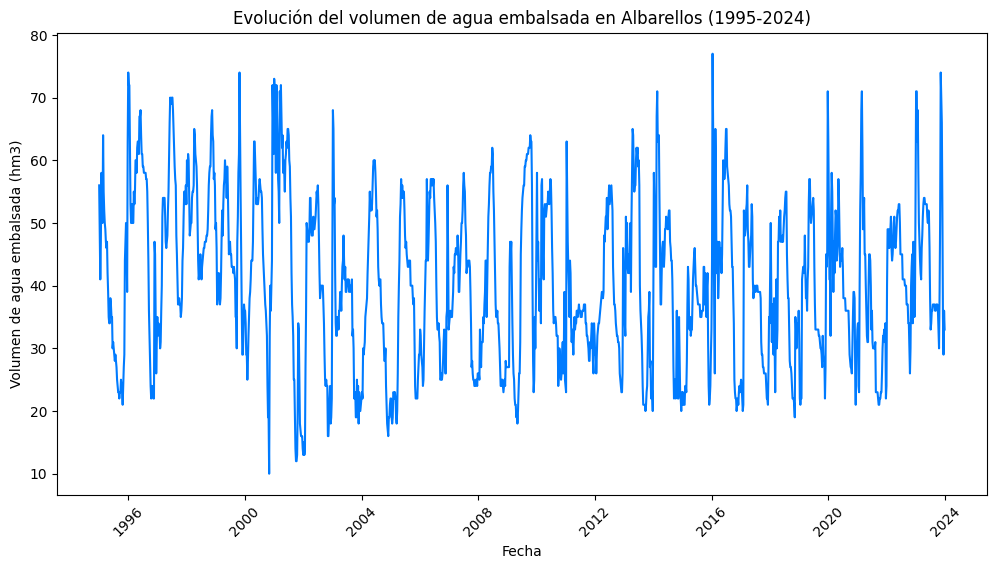

In [569]:
albarellos_data = tabla_lin[tabla_lin['nombre_embalse'] == 'Albarellos']

plt.figure(figsize=(12, 6))
sns.lineplot(data=albarellos_data, x="fecha", y="volumen_actual", color="#007bff")

plt.xticks(rotation=45)
plt.title('Evolución del volumen de agua embalsada en Albarellos (1995-2024)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de agua embalsada (hm3)')

plt.show()

Agrupamos las variables por embalse, calculamos la media de los registros del `volumen_actual` y renombramos la nueva variable. Con este proceso se busca calcular el valor medio de volumen de agua por embalse

In [579]:
# Agrupamos el dataset por nombre del embalse y generamos una columna con la media del volumen
tabla_vol = round(tabla_lin.groupby(["demarcacion_hidrografica", "nombre_embalse"])["volumen_actual"].mean().reset_index(),2)

# Renombramos la nueva columna generada
tabla_vol = tabla_vol.rename(columns= {"volumen_actual": "volumen_medio_10"})
tabla_vol.head()

,demarcacion_hidrografica,nombre_embalse,volumen_medio_10
0,Cantábrico Occidental,Alfilorios,6.02
1,Cantábrico Occidental,Alsa - Mediajo,19.26
2,Cantábrico Occidental,Arbón,35.40
3,Cantábrico Occidental,"Barca, La",26.34
4,Cantábrico Occidental,"Cohilla, La",5.14


* Vemos que esta inforamción puede ser muy útil si la representamos por ejemplo en un gráfico de barras, ya que podemos comparar el volumen medio de agua de los embalses de una determinada demarcación hidrografica. Por ejemplo, a continuación se compara el volumen medio de agua embalsada en la demarcación Hidrográfica del Cantabrico Occidental

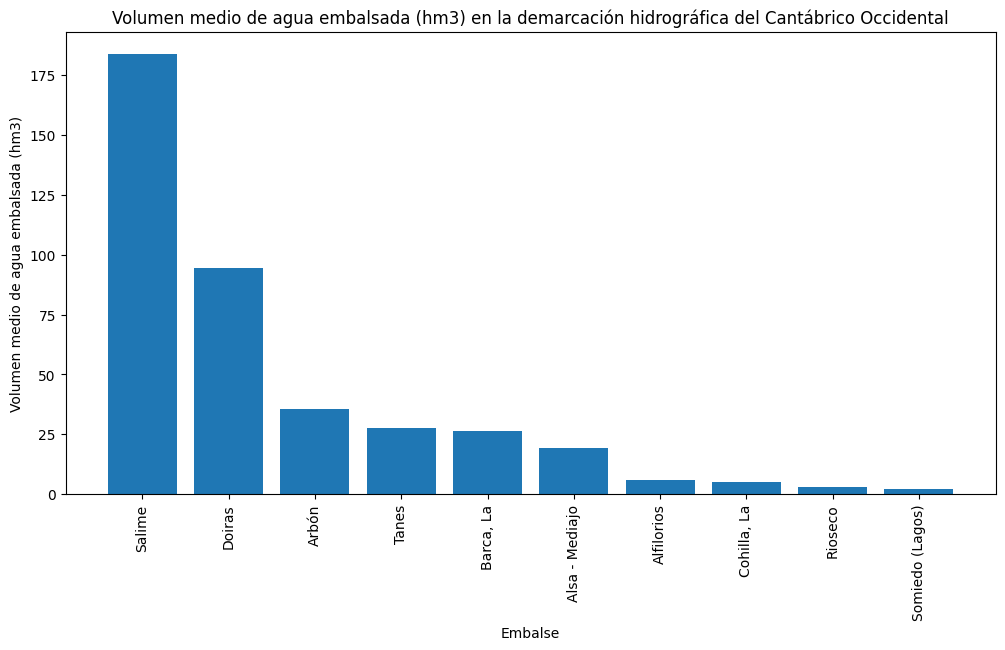

In [580]:
tabla_vol_cantabrico_occidental = tabla_vol[tabla_vol['demarcacion_hidrografica'] == 'Cantábrico Occidental']
tabla_vol_cantabrico_occidental = tabla_vol_cantabrico_occidental.sort_values(by=['volumen_medio_10'], ascending=False)

# Obtener los nombres y volumen medio de los embalses
embalses = tabla_vol_cantabrico_occidental['nombre_embalse'].tolist()
volumenes = tabla_vol_cantabrico_occidental['volumen_medio_10'].tolist()

plt.figure(figsize=(12, 6))
plt.bar(embalses, volumenes)

plt.xticks(rotation=90)
plt.title('Volumen medio de agua embalsada (hm3) en la demarcación hidrográfica del Cantábrico Occidental')
plt.xlabel('Embalse')
plt.ylabel('Volumen medio de agua embalsada (hm3)')

plt.show()

### 8.2 Reserva hídrica (%) entre 1995 y 2024

Agrupamos las variables por embalse, calculamos la media de los registros del `porcentaje_actual` y renombramos la nueva variable. Con este proceso se busca calcular el valor medio del porcentaje de llenado por embalse.

In [560]:
# Agrupamos el dataset por nombre del embalse y generamos una columna con la media del porcentaje
tabla_pctg = round(tabla_lin.groupby(["demarcacion_hidrografica", "nombre_embalse"])["porcentaje_actual"].mean().reset_index(),2)

# Renombramos la nueva columna generada
tabla_pctg = tabla_pctg.rename(columns= {"porcentaje_actual": "porcentaje_medio_10"})
tabla_pctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   demarcacion_hidrografica  401 non-null    object 
 1   nombre_embalse            401 non-null    object 
 2   porcentaje_medio_10       401 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.5+ KB


### 8.3 Evolución mensual de la reserva hídrica (hm3)

Esta tabla contiene los datos medios de volumen de agua embalsada por mes para distintas series temporales. Esta series temporales corresponden a los años entre 1995 y 2024

\
Para ello partimos del dataset filtrado anteriormente con los datos pertenecientes al periodo temporal entre el 01/01/1995 y el 01/01/2024. Una vez filtrado, agrupamos las variables por embalse y mes, calculamos la media de los registros del volumen de agua y renombramos la nueva variable.

\
Con este proceso se busca agrupar los datos de `volumen_actual`por mes.

In [565]:
# Creamos una lista con las fechas iniciales y finales de las series temporales
lista = ['01/01/1995', '01/01/1996', '01/01/1997', '01/01/1998', '01/01/1999', '01/01/2000', '01/01/2001',
         '01/01/2002', '01/01/2003', '01/01/2004', '01/01/2005', '01/01/2006', '01/01/2007', '01/01/2008',
         '01/01/2009', '01/01/2010', '01/01/2011', '01/01/2012', '01/01/2013', '01/01/2014', '01/01/2015',
         '01/01/2016', '01/01/2017', '01/01/2018', '01/01/2019', '01/01/2020', '01/01/2021', '01/01/2022',
         '01/01/2023', '01/01/2024']

for i in range(len(lista)-1):
    # Filtramos el dataset con los datos correspondientes a cada una de las series temporales
    tabla_mini = tabla_lin[(df_embalses["fecha"] > lista[i]) & (df_embalses["fecha"]<lista[i+1])]
    # Agrupamos el dataset por demarcación hidrográfica, nombre del embalse y mes. Generamos una columna con la media del volumen
    lin = tabla_mini.groupby(["demarcacion_hidrografica","nombre_embalse", "mes"])["volumen_actual"].mean().reset_index()
    # Renombramos la nueva columna generada con el valor medio
    lin = lin.rename(columns= {"volumen_actual": lista[i].split("/")[2]})

    # Unificamos los datos de las distintas series temporales en una misma tabla
    if i == 0:
      tabla_lin_mes = lin
    else:
      tabla_lin_mes = tabla_lin_mes.merge(lin, on=["demarcacion_hidrografica","nombre_embalse","mes"], how = "inner")

tabla_lin_mes.head()

<ipython-input-565-c28a49278e56>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabla_mini = tabla_lin[(df_embalses["fecha"] > lista[i]) & (df_embalses["fecha"]<lista[i+1])]
<ipython-input-565-c28a49278e56>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabla_mini = tabla_lin[(df_embalses["fecha"] > lista[i]) & (df_embalses["fecha"]<lista[i+1])]
<ipython-input-565-c28a49278e56>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabla_mini = tabla_lin[(df_embalses["fecha"] > lista[i]) & (df_embalses["fecha"]<lista[i+1])]
<ipython-input-565-c28a49278e56>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabla_mini = tabla_lin[(df_embalses["fecha"] > lista[i]) & (df_embalses["fecha"]<lista[i+1])]
<ipython-input-565-c28a49278e56>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabla_mini = tabla_lin[(df_embalses["fecha"] > li

,demarcacion_hidrografica,nombre_embalse,mes,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Cantábrico Occidental,Alfilorios,1,4.80,5.2,8.0,7.00,5.5,6.0,5.8,...,6.00,4.75,4.5,4.00,6.20,6.50,8.0,7.0,7.0,3.60
1,Cantábrico Occidental,Alfilorios,2,5.00,6.0,8.0,6.75,6.0,6.0,7.5,...,6.75,6.00,5.5,4.75,7.75,8.00,8.0,8.0,7.0,5.25
2,Cantábrico Occidental,Alfilorios,3,5.75,6.5,8.0,6.40,6.0,6.0,8.0,...,7.75,7.80,7.4,5.00,8.00,7.75,8.0,8.0,7.2,6.00
3,Cantábrico Occidental,Alfilorios,4,5.25,7.2,6.8,6.50,6.5,7.0,8.0,...,8.00,8.00,8.0,5.00,8.00,8.00,8.0,8.0,8.0,6.00
4,Cantábrico Occidental,Alfilorios,5,5.00,8.0,6.0,8.00,7.0,8.0,8.0,...,8.00,8.00,8.0,4.00,8.00,8.00,8.0,8.0,8.0,5.00


### 8.4 Guardado de tablas

Hemos observado que realizando algunas operaciones de agrupación, se obtiene información muy interesante para la creación de visualziaciones, sin embargo, existen herramientas especializadas para realizar este tipo de tareas, por ello, se va a guardar esta información en formato CSV para utilizarlo en otras herramientas de visualización de datos como PowerBI. Es importante guardarlo con una codificación UTF-8 (Formato de Transformación Unicode) para que los caracteres especiales sean identificados de manera correcta por cualquier software.

In [581]:
tabla_lin.to_csv("lineas.csv", index = False, encoding = "utf-8")
tabla_vol.to_csv("volumen.csv", index = False, encoding = "utf-8")
tabla_pctg.to_csv("porcentaje.csv", index = False, encoding = "utf-8")
tabla_lin_mes.to_csv("lineas_mensual.csv", index = False, encoding = "utf-8")